# Data Labelling Analysis (DLA) Evaluation Dataset F

In [1]:
#import libraries
import warnings
warnings.filterwarnings("ignore")
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import os
print('Libraries imported!!')

Libraries imported!!


In [2]:
#define directory of functions and actual directory
HOME_PATH = '' #home path of the project
FUNCTIONS_DIR = 'EVALUATION FUNCTIONS/RESEMBLANCE'
ACTUAL_DIR = os.getcwd()

#change directory to functions directory
os.chdir(HOME_PATH + FUNCTIONS_DIR)

#import functions for data labelling analisys
from data_labelling import mix_data
from data_labelling import split_data
from data_labelling import DataPreProcessor
from data_labelling import ClassificationModels

#change directory to actual directory
os.chdir(ACTUAL_DIR)
print('Functions imported!!')

Functions imported!!


## 1. Read real and synthetic datasets
In this part real and synthetic datasets are read.

In [3]:
#Define global variables
DATA_TYPES = ['Real','GM','SDV','CTGAN','WGANGP']
SYNTHESIZERS = ['GM','SDV','CTGAN','WGANGP']
FILEPATHS = {'Real' : HOME_PATH + 'REAL DATASETS/TRAIN DATASETS/F_IndianLiverPatient_Real_Train.csv',
            'GM' : HOME_PATH + 'SYNTHETIC DATASETS/GM/F_IndianLiverPatient_Synthetic_GM.csv',
            'SDV' : HOME_PATH + 'SYNTHETIC DATASETS/SDV/F_IndianLiverPatient_Synthetic_SDV.csv',
            'CTGAN' : HOME_PATH + 'SYNTHETIC DATASETS/CTGAN/F_IndianLiverPatient_Synthetic_CTGAN.csv',
            'WGANGP' : HOME_PATH + 'SYNTHETIC DATASETS/WGANGP/F_IndianLiverPatient_Synthetic_WGANGP.csv'}
categorical_columns = ['gender','class']
data = dict()

In [4]:
#iterate over all datasets filepaths and read each dataset
for name, path in FILEPATHS.items() :
    data[name] = pd.read_csv(path)
    for col in categorical_columns :
        data[name][col] = data[name][col].astype('category')
data

{'Real':      age  gender   TB   DB  alkphos  sgpt   sgot   TP  ALB   A_G class
 0     68  Female  0.6  0.1   1620.0  95.0  127.0  4.6  2.1  0.80   1.0
 1     31    Male  1.3  0.5    184.0  29.0   32.0  6.8  3.4  1.00   1.0
 2     28    Male  0.8  0.3    190.0  20.0   14.0  4.1  2.4  1.40   1.0
 3     60    Male  2.3  0.6    272.0  79.0   51.0  6.6  3.5  1.10   1.0
 4     48  Female  0.9  0.2    173.0  26.0   27.0  6.2  3.1  1.00   1.0
 ..   ...     ...  ...  ...      ...   ...    ...  ...  ...   ...   ...
 461   75  Female  0.8  0.2    188.0  20.0   29.0  4.4  1.8  0.60   1.0
 462   36    Male  5.3  2.3    145.0  32.0   92.0  5.1  2.6  1.00   2.0
 463   37    Male  0.7  0.2    235.0  96.0   54.0  9.5  4.9  1.00   1.0
 464   17  Female  0.5  0.1    206.0  28.0   21.0  7.1  4.5  1.70   2.0
 465   17    Male  0.9  0.2    224.0  36.0   45.0  6.9  4.2  1.55   1.0
 
 [466 rows x 11 columns],
 'GM':      age  gender        TB        DB     alkphos        sgpt        sgot  \
 0     68    Male

## 2. Mix real data with synthetic data

In [5]:
mixed_data = dict()
for name in SYNTHESIZERS :
    mixed_data[name] = mix_data(data['Real'], data[name])
mixed_data

{'GM':      age  gender         TB         DB     alkphos       sgpt        sgot  \
 259   53    Male   1.315067   0.242477   50.000688  49.643474  128.305072   
 97    54  Female  23.200000  12.600000  574.000000  43.000000   47.000000   
 144   68    Male   1.429678   0.812187  249.812344  62.894633   47.065755   
 9     55    Male   1.439845   0.795778  203.524859  83.455427   12.636033   
 253   50    Male   1.100000   0.300000  175.000000  20.000000   19.000000   
 ..   ...     ...        ...        ...         ...        ...         ...   
 327   37    Male   2.953134   0.570831  297.131187  28.900725   40.251322   
 22    17    Male   2.529527   3.287912  337.007847  43.425354   50.992168   
 222   24    Male   1.471051   0.395399  902.311240  78.703832   70.495975   
 203   17  Female   0.700000   0.200000  145.000000  18.000000   36.000000   
 366   49    Male   0.600000   0.100000  218.000000  50.000000   53.000000   
 
            TP       ALB       A_G class  Label  
 259  

- 0 for real data
- 1 for synthetic data

## 2. Split train and test data

In [6]:
train_len = 0.8
train_data = dict()
test_data = dict()
for name in SYNTHESIZERS :
    print(name)
    train_data[name], test_data[name] = split_data(mixed_data[name], train_len)
    print(train_data[name].shape, test_data[name].shape)
    print('Train data', train_data[name].groupby('Label').size())
    print('Test data', test_data[name].groupby('Label').size())
    print('##############################################')

GM
(745, 12) (186, 12)
Train data Label
0.0    366
1.0    379
dtype: int64
Test data Label
0.0    99
1.0    87
dtype: int64
##############################################
SDV
(745, 12) (186, 12)
Train data Label
0.0    368
1.0    377
dtype: int64
Test data Label
0.0    98
1.0    88
dtype: int64
##############################################
CTGAN
(745, 12) (186, 12)
Train data Label
0.0    384
1.0    361
dtype: int64
Test data Label
0.0     82
1.0    104
dtype: int64
##############################################
WGANGP
(745, 12) (186, 12)
Train data Label
0.0    376
1.0    369
dtype: int64
Test data Label
0.0    89
1.0    97
dtype: int64
##############################################


## 3. Train Classifiers

In [7]:
categorical_columns = ['gender','class']
numerical_columns = data['Real'].select_dtypes(include=['int64','float64']).columns.tolist()
categories = [np.array([0, 1]), np.array([0, 1])]

#initialize classifiers
classifiers_all = dict()
data_preprocessors = dict()

target = 'Label'

for name in SYNTHESIZERS : 
    print(name)
    
    classifiers_all[name] = ClassificationModels()
    
    data_preprocessors[name] = DataPreProcessor(categorical_columns, numerical_columns, categories)
    x_train = data_preprocessors[name].preprocess_train_data(train_data[name].iloc[:, train_data[name].columns != target])
    y_train = train_data[name].loc[:, target]
    
    classifiers_all[name].train_classifiers(x_train, y_train)
    
    print('####################################################')

GM
RF Trained
KNN Trained
DT Trained
SVM Trained
MLP Trained
####################################################
SDV
RF Trained
KNN Trained
DT Trained
SVM Trained
MLP Trained
####################################################
CTGAN
RF Trained
KNN Trained
DT Trained
SVM Trained
MLP Trained
####################################################
WGANGP
RF Trained
KNN Trained
DT Trained
SVM Trained
MLP Trained
####################################################


## 5. Evaluate Classifiers

In [8]:
results_all = dict()

for name in SYNTHESIZERS : 
    print(name)
    
    x_test = data_preprocessors[name].preprocess_test_data(test_data[name].loc[:, test_data[name].columns != target])
    print(x_test.shape)
    y_test = test_data[name].loc[:, target]
    
    classifiers_all[name].evaluate_classifiers(x_test, y_test)
    print('####################################################')

GM
(186, 13)
RF Tested
  model  accuracy  precision  recall      f1
0    RF    0.8978      0.925  0.8506  0.8862
KNN Tested
  model  accuracy  precision  recall      f1
0   KNN    0.5161     0.4789  0.3908  0.4304
DT Tested
  model  accuracy  precision  recall      f1
0    DT    0.8548     0.8261  0.8736  0.8492
SVM Tested
  model  accuracy  precision  recall      f1
0   SVM    0.4731     0.4486  0.5517  0.4948
MLP Tested
  model  accuracy  precision  recall      f1
0   MLP    0.6237     0.5895  0.6437  0.6154
####################################################
SDV
(186, 13)
RF Tested
  model  accuracy  precision  recall   f1
0    RF       1.0        1.0     1.0  1.0
KNN Tested
  model  accuracy  precision  recall      f1
0   KNN    0.8763     0.8652   0.875  0.8701
DT Tested
  model  accuracy  precision  recall   f1
0    DT       1.0        1.0     1.0  1.0
SVM Tested
  model  accuracy  precision  recall      f1
0   SVM    0.8871     0.8681  0.8977  0.8827
MLP Tested
  model  accurac

## 6. Analyse models results

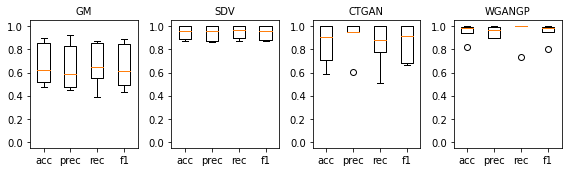

In [9]:
fig, axs = plt.subplots(nrows=1, ncols=4, figsize=(8, 2.5))
axs_idxs = [[0,0], [0,1], [1,0], [1,1]]
axs_idxs = [0, 1, 2, 3]
idx = dict(zip(SYNTHESIZERS,axs_idxs))

for name in SYNTHESIZERS :
    ax_plot = axs[idx[name]]
    classifiers_all[name].plot_classification_metrics(ax_plot)
    ax_plot.set_title(name, fontsize=10)

plt.tight_layout()
fig.savefig('DATA LABELLING RESULTS/CLASSIFICATION_METRICS.svg', bbox_inches='tight')